<a href="https://colab.research.google.com/github/omajipawar/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction_(Omaji_Pawar).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Problem Statement**

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

## **Introduction**

World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using ML techniques.

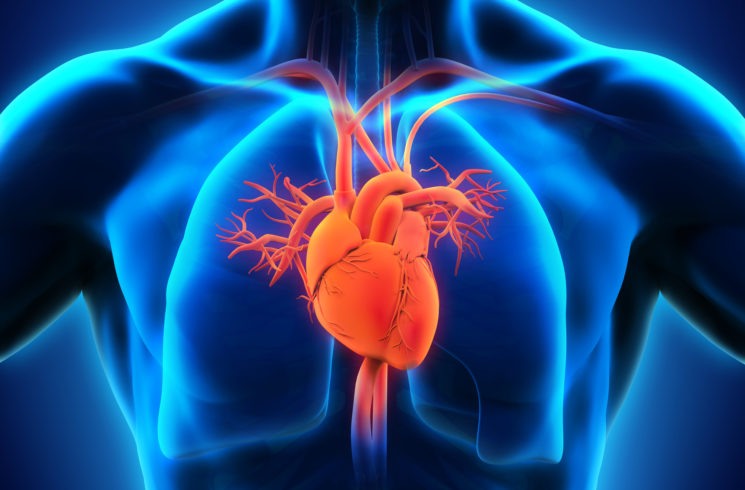

In [1]:
#Importing Python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## **Mounting drive and reading the dataset.**

In [2]:
#Mounting the drive
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [3]:
#Working directory Path
file_path = '/content/drive/MyDrive/csv files/data_cardiovascular_risk.csv'

In [4]:
#Reading the dataset
df= pd.read_csv(file_path)

## **Data Exploration**

In [5]:
#Observing first five rows of dataframe
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [6]:
#Last five rows
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [7]:
#Shape of dataframe
df.shape

(3390, 17)

In [8]:
#basic information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [9]:
#Descriptive summary 
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


**Looking for and handling NaN values**

In [10]:
#Column wise NaN values
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

Replacing missing values of categorical columns with mode and countinuous values columns with mean.

In [11]:
df['education'].fillna(df['education'].mode()[0],inplace=True)
df['cigsPerDay'].fillna(df['cigsPerDay'].mean(),inplace=True)
df['BPMeds'].fillna(df['BPMeds'].mode()[0],inplace=True)
df['totChol'].fillna(df['totChol'].mean(),inplace=True)
df['BMI'].fillna(df['BMI'].mean(),inplace=True)
df['glucose'].fillna(df['glucose'].mode()[0],inplace=True)
df['heartRate'].fillna(df['heartRate'].mode()[0],inplace=True)

In [12]:
#Checking for null values after imputation
df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Now the dataframe is free of NaN values.

## **Outliers**

Outliers can be detected by plotting boxplots.

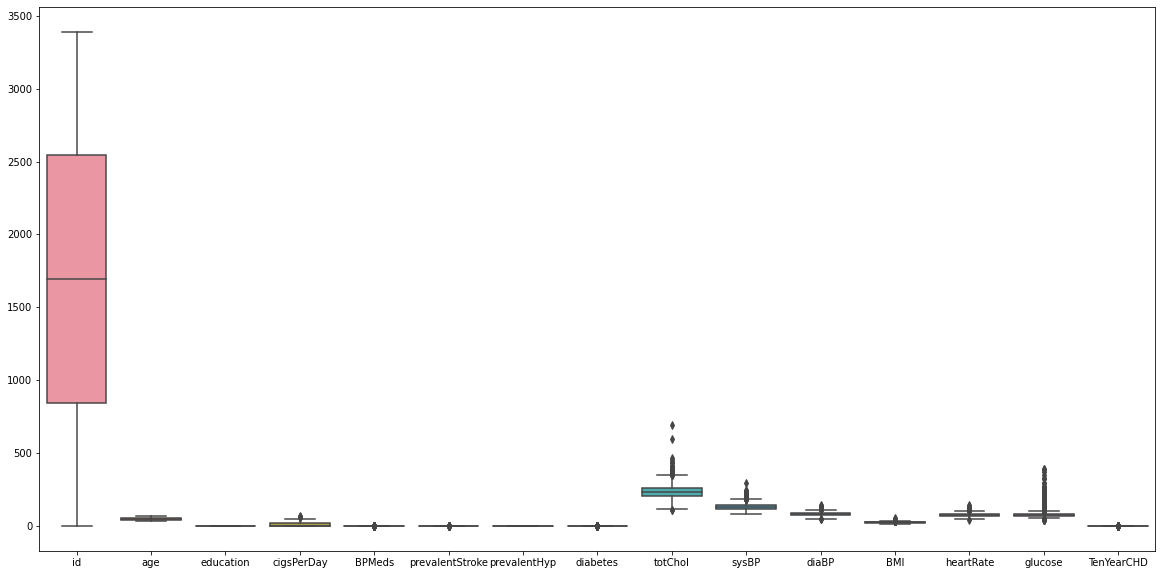

In [13]:
#Plotting boxplot of each column
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=df)
plt.show()

Outliers in all other numerical columns are important and thus cannot be removed.

## **EDA and Visualization**

**Univariate Analysis**

1. Continuous variables

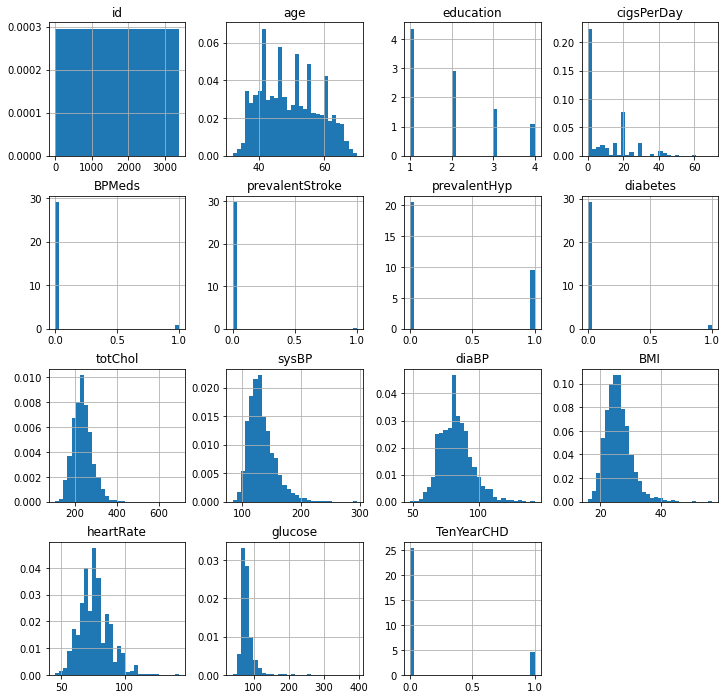

In [14]:
#Distribution of variables
df.hist(bins=30, figsize=(12,12), density=True)
plt.show()

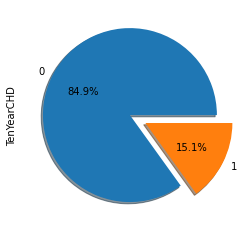

In [15]:
#Let's take a look on distribution of target variable
#Plotting a pie chart 
df['TenYearCHD'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',shadow=True)

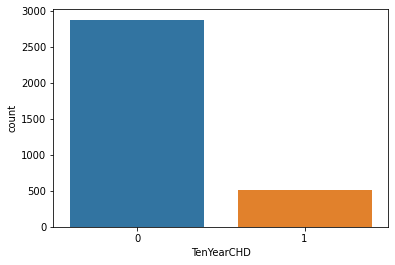

In [16]:
#Countplot of target variable
sns.countplot(df['TenYearCHD'])

In [17]:
#value counts 
df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

2. Categorical variables

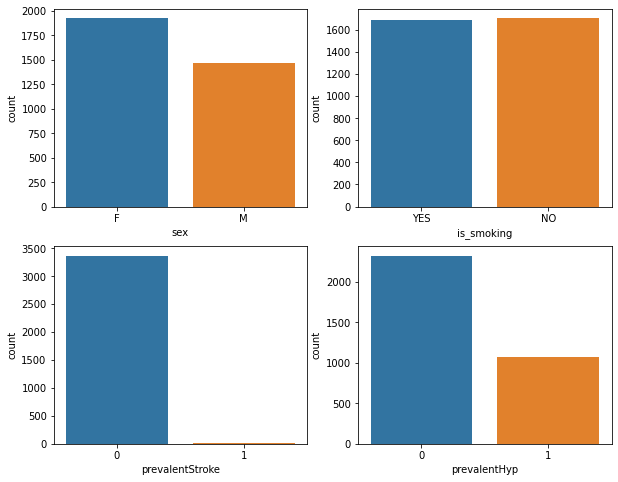

In [18]:
#Plotting countplots of columns
plt.figure(figsize=(10, 8))
plt.subplot(2,2,1)
sns.countplot(df['sex'])                     #Countplot showing the count of male and female

plt.subplot(2,2,2)
sns.countplot(df['is_smoking'])              #Countplot showing count of smokers and non smokers

plt.subplot(2,2,3)
sns.countplot(df['prevalentStroke'])         #Countplot of prevalentStroke column

plt.subplot(2,2,4)
sns.countplot(df['prevalentHyp'])            #Countplot of prevalentHyp column
plt.show()

## **Finding correlation in variables (both dependent and independent, Visualizations on data)**

**Bivariate Analysis**

1. Bivariate Analysis of Categorical columns

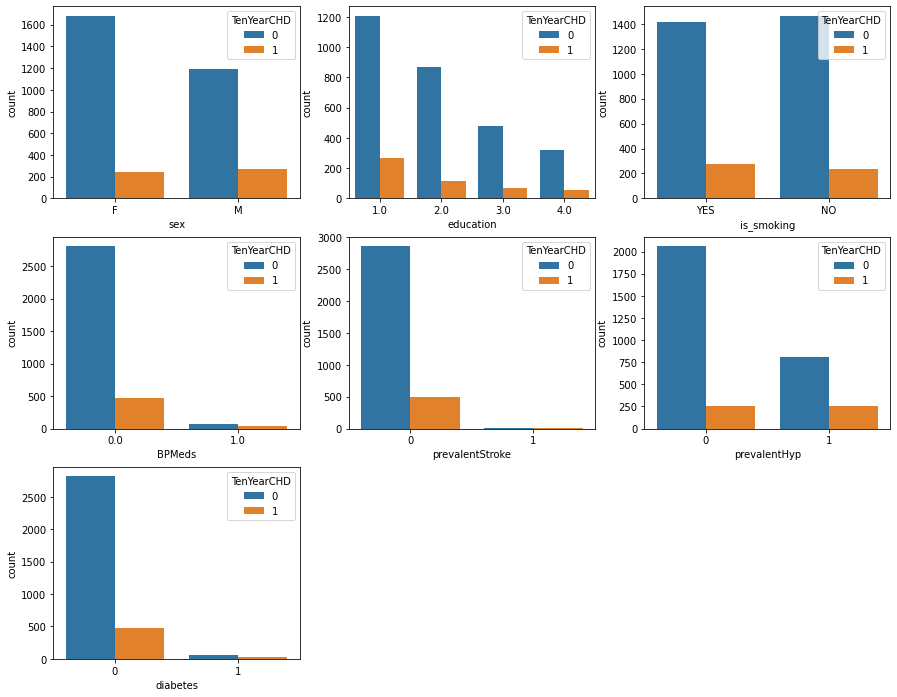

In [19]:
plt.figure(figsize=(15, 12))

plt.subplot(3,3,1)
sns.countplot('sex',hue='TenYearCHD',data=df)
plt.subplot(3,3,2)
sns.countplot('education',hue='TenYearCHD',data=df)
plt.subplot(3,3,3)
sns.countplot('is_smoking',hue='TenYearCHD',data=df)
plt.subplot(3,3,4)
sns.countplot('BPMeds',hue='TenYearCHD',data=df)
plt.subplot(3,3,5)
sns.countplot('prevalentStroke',hue='TenYearCHD',data=df)
plt.subplot(3,3,6)
sns.countplot('prevalentHyp',hue='TenYearCHD',data=df)
plt.subplot(3,3,7)
sns.countplot('diabetes',hue='TenYearCHD',data=df)

plt.show()

**Observations:**



*   There seems to be a slighlty higher risk if its a male.
*   The more educated people are the lower their risk, makes sense as they have more knowledge on how to take care of themselves.
*   Risk is the same for both smoker and non-smoker.
*   People taking BPMeds have a higher risk.
*   People that have had a stroke are at greater risk.
*   People who are hypertensive are at greater risk.
*   People with diabetes are at a higher risk













2. Bivariate Analysis of numerical columns

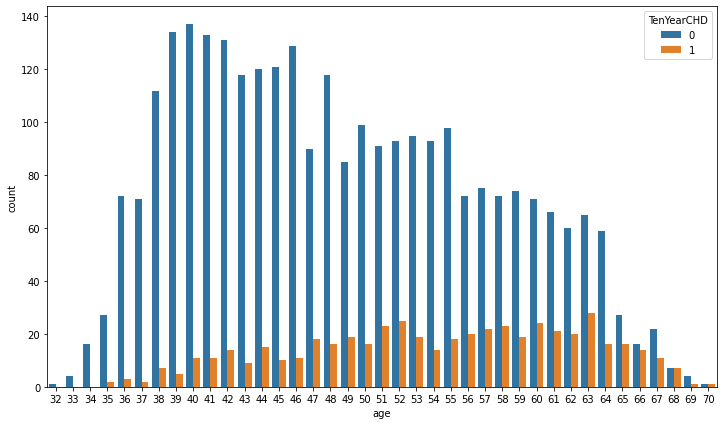

In [20]:
#Plotting histogram of age with respect to TenYearCHD
plt.figure(figsize=(12, 7))
sns.countplot('age',hue='TenYearCHD',data=df)



*   There seems to be increased risk with age.




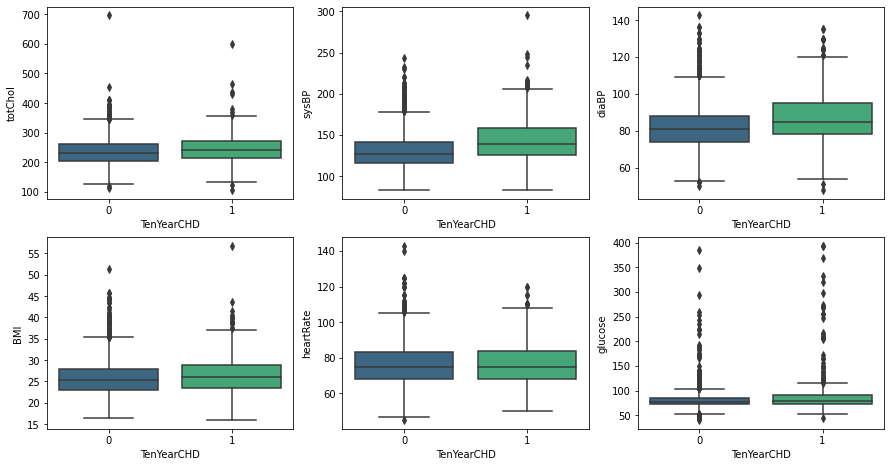

In [21]:
#Plotting boxplots 
plt.figure(figsize=(15, 12))

plt.subplot(3,3,1)
sns.boxplot(df['TenYearCHD'], df['totChol'], palette = 'viridis')
plt.subplot(3,3,2)
sns.boxplot(df['TenYearCHD'], df['sysBP'], palette = 'viridis')
plt.subplot(3,3,3)
sns.boxplot(df['TenYearCHD'], df['diaBP'], palette = 'viridis')
plt.subplot(3,3,4)
sns.boxplot(df['TenYearCHD'], df['BMI'], palette = 'viridis')
plt.subplot(3,3,5)
sns.boxplot(df['TenYearCHD'], df['heartRate'], palette = 'viridis')
plt.subplot(3,3,6)
sns.boxplot(df['TenYearCHD'], df['glucose'], palette = 'viridis')

plt.show()

**Observations:**



*   People with risk of CHD seem to have slighlty elevated cholestrol levels.
*   People with risk of CHD seem to have elevated levels of systolic blood pressure (sysBP).

*   People with risk of CHD seem to have elevated levels of diastolic blood pressure (diaBP).
*   People with risk of CHD seem to have slighlty elevated BMI.

*   People with risk of CHD seem to have slighlty elevated heart rate.
*   People with risk of CHD seem to have slighlty elevated glucose levels.







**Heatmap**



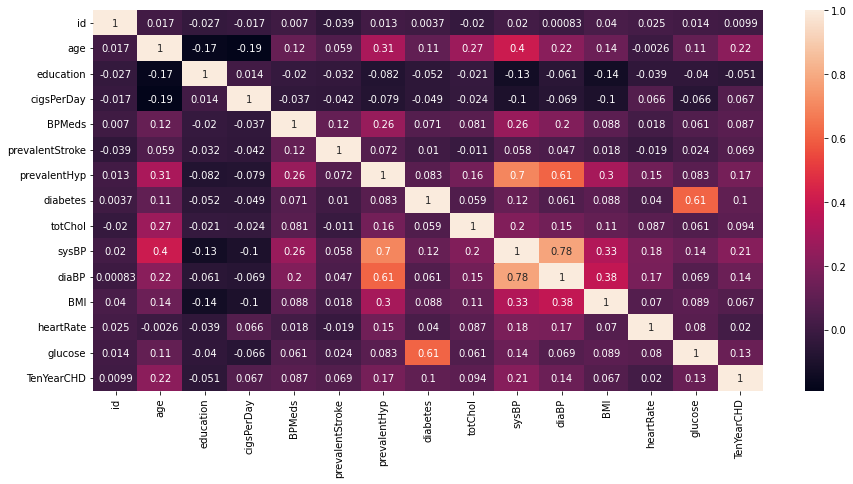

In [22]:
#Plotting heatmap
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)

**Observations:**

*   'diabetes' is quite correlated with 'glucose' . (0.61)
*   ‘prevalentHyp’ is correlated with ‘sysBP’ with correlation of 0.7
*   'diaBP' is quite correlated with 'sysBP'. (0.78)







## **Feature Engineering**



*   According the correlation matrices above, it can be seen that 'diabetes' is quite correlated with 'glucose' and 'diabetes' is quite correlated with 'sysBP'.
*   ‘prevalentHyp’ is correlated with ‘sysBP’

*   Therefore 'diabetes' and 'sysBP' are dropped.
*   'id' column is not important for model building, so we can drop it.





In [23]:
#Dropping unnecessory columns
df.drop(columns=['diabetes','sysBP','id'],axis=1,inplace=True)

**One Hot Encoding**

In [24]:
#One-Hot encoding the categorical parameters using get_dummies()
df = pd.get_dummies(df, columns = ['sex', 'is_smoking',])
df.head()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_F,sex_M,is_smoking_NO,is_smoking_YES
0,64,2.0,3.0,0.0,0,0,221.0,85.0,25.794964,90.0,80.0,1,1,0,0,1
1,36,4.0,0.0,0.0,0,1,212.0,98.0,29.770000,72.0,75.0,0,0,1,1,0
2,46,1.0,10.0,0.0,0,0,250.0,71.0,20.350000,88.0,94.0,0,1,0,0,1
3,50,1.0,20.0,0.0,0,1,233.0,88.0,28.260000,68.0,94.0,1,0,1,0,1
4,64,1.0,30.0,0.0,0,0,241.0,85.0,26.420000,70.0,77.0,0,1,0,0,1


## **Train test split**

In [25]:
X = df.drop('TenYearCHD',axis=1)       #independent variables
y = df['TenYearCHD']                   #dependent variable

**Handling Imbalance data**

0    2879
1     511
Name: TenYearCHD, dtype: int64


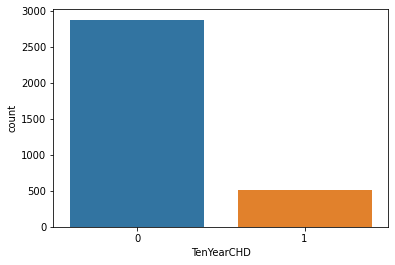

In [26]:
#Value counts of target variable
print(y.value_counts())

#Plotting a countplot
sns.countplot(y)

As we can see our data is highly imbalanced, so I have used SMOTE to overcome this problem.


Synthetic Minority Oversampling Technique or SMOTE is a technique to oversample the minority class. Simply adding duplicate records of minority class often don’t add any new information to the model. In SMOTE new instances are synthesized from the existing data. 


In [27]:
#Using SMOTE technique to oversample minority class

#Importing SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'minority')
X, y = smote.fit_resample(X, y)

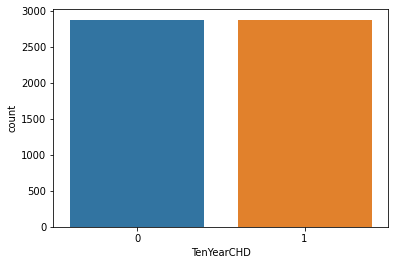

In [28]:
#Let's take a look on target variable after handling imbalance

#Countplot
sns.countplot(y)

In [29]:
#Shape of dependent and independen variables
print(X.shape,y.shape)

(5758, 15) (5758,)


**Feature Scaling**

In [30]:
#Importing and applying StandardScalar
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X = scalar.fit_transform(X)

In [31]:
#Importing train-test-split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

## **Model Implementation**

**1. Logistic Regression**

In [38]:
#importing logistic regression
from sklearn.linear_model import LogisticRegression

#Creating a object 
LR = LogisticRegression()

LR.fit(X_train,y_train)

#Prediction on train and test dataset
y_pred_train1 = LR.predict(X_train)
y_pred_test1  = LR.predict(X_test)

#Model Evaluation

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

print("Train accuracy is",accuracy_score(y_train,y_pred_train1))
print('Test Accuracy is', accuracy_score(y_test,y_pred_test1))
print(classification_report(y_test,y_pred_test1))

Train accuracy is 0.7522796352583586
Test Accuracy is 0.7630208333333334
              precision    recall  f1-score   support

           0       0.71      0.85      0.78       553
           1       0.83      0.68      0.75       599

    accuracy                           0.76      1152
   macro avg       0.77      0.77      0.76      1152
weighted avg       0.77      0.76      0.76      1152



**2. K-Nearest Neighbour Classifier (KNN)**

In [47]:
#Importing KNN classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

#Prediction on train and test dataset
y_pred_train2 = knn.predict(X_train)
y_pred_test2  = knn.predict(X_test)

#Model Evaluation

print("Train accuracy is",accuracy_score(y_train,y_pred_train2))
print('Test Accuracy is',accuracy_score(y_test,y_pred_test2))
print(classification_report(y_test,y_pred_test2))

Train accuracy is 0.8892748588797221
Test Accuracy is 0.8298611111111112
              precision    recall  f1-score   support

           0       0.84      0.79      0.82       553
           1       0.82      0.86      0.84       599

    accuracy                           0.83      1152
   macro avg       0.83      0.83      0.83      1152
weighted avg       0.83      0.83      0.83      1152



**3.Support Vector Machine (SVM)**

In [49]:
#Importing SVC
from sklearn.svm import SVC

#Model training
svc = SVC()
svc.fit(X_train,y_train)

#Prediction on train and test dataset
y_pred_train3 = svc.predict(X_train)
y_pred_test3  = svc.predict(X_test)

#Model Evaluation

print('Train accuaracy is',accuracy_score(y_train,y_pred_train3))
print('Test accuracy is',accuracy_score(y_test,y_pred_test3))

print(classification_report(y_test,y_pred_test3))

Train accuaracy is 0.8189318280503691
Test accuracy is 0.8012152777777778
              precision    recall  f1-score   support

           0       0.75      0.89      0.81       553
           1       0.87      0.72      0.79       599

    accuracy                           0.80      1152
   macro avg       0.81      0.80      0.80      1152
weighted avg       0.81      0.80      0.80      1152



In [53]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_pred_test3)


0.8044737008938949

**4.Naive Baye’s Classifier**

In [50]:
#Importing Naive Baye's Classifier
from sklearn.naive_bayes import GaussianNB

#Model training
nbc = GaussianNB()
nbc.fit(X_train,y_train)

#Prediction on train and test dataset
y_pred_train4 = nbc.predict(X_train)
y_pred_test4  = nbc.predict(X_test)

#Model Evaluation

print('Train accuaracy is',accuracy_score(y_train,y_pred_train4))
print('Test accuracy is',accuracy_score(y_test,y_pred_test4))
print(classification_report(y_test,y_pred_test4))

Train accuaracy is 0.6534954407294833
Test accuracy is 0.6493055555555556
              precision    recall  f1-score   support

           0       0.59      0.85      0.70       553
           1       0.77      0.47      0.58       599

    accuracy                           0.65      1152
   macro avg       0.68      0.66      0.64      1152
weighted avg       0.68      0.65      0.64      1152



**5.Decision Tree Classifier**

In [51]:
#Importing DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

#Model training
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

#Prediction on train and test dataset
y_pred_train5 = dt.predict(X_train)
y_pred_test5  = dt.predict(X_test)

#Model Evaluation

print('Train accuaracy is',accuracy_score(y_train,y_pred_train5))
print('Test accuracy is',accuracy_score(y_test,y_pred_test5))

print(classification_report(y_test,y_pred_test5))

Train accuaracy is 1.0
Test accuracy is 0.8081597222222222
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       553
           1       0.81      0.83      0.82       599

    accuracy                           0.81      1152
   macro avg       0.81      0.81      0.81      1152
weighted avg       0.81      0.81      0.81      1152

